### ベイズ最適化
ベイズ最適化は、ある未知の関数$f(\boldsymbol{x})$を最大とする解$\boldsymbol{x}^*=argmax_{\boldsymbol{x}\in X}f(\boldsymbol{x})$を求める問題である。

エージェントは各時刻$t$で解空間$X$から解をひとつ選択する。このとき選ばれた解を$\boldsymbol{x}_t\in X$とする。
これに対し、エージェントは評価値の期待値の関数$f(\boldsymbol{x}_t)$(期待値関数)から評価値$r_t$を受け取る。
このとき評価値にばらつきが含まれるものとし、
$$
r_t\sim N(f(\boldsymbol{x}_t),\sigma^2)
$$
なる正規分布から生成されるものとする。
この状況下で、最小限の評価回数で期待値を最大とする最適解$\boldsymbol{x}_*=argmax_{\boldsymbol{x}\in X}f(\boldsymbol{x})$を見つけることを目指す。

### ガウス過程
ガウス過程は確率過程の一つで、確率過程とは、確率変数の列に対する確率分布である。
確率変数の列をあらゆる入力$\boldsymbol{x}$に対する関数値$f(\boldsymbol{x})$だとすれば、関数$f$を確率変数に見立てた確率分布ということもできる。
そして、この確率分布が多次元正規部分で表されるものをとくにガウス過程と呼ぶ。

線形モデルを仮定したときに報酬の期待値が従う事後分布は次のようになる。
$$
f_*\sim N(\boldsymbol{\phi}(\boldsymbol{x}_*)^T\boldsymbol{\mu}_t,\boldsymbol{\phi}(\boldsymbol{x}_*)^T\Sigma_t\boldsymbol{\phi}(\boldsymbol{x}_*))
$$

$N$個の入力点列$X_*=(\boldsymbol{x}_{*,1},\cdots,\boldsymbol{x}_{*,N})^T$に対する関数値列$\boldsymbol{f}_*=(f_{*,1},\cdots,f_{*,N})^T$を考えることもできる。
入力点列$X_*$に対応する計画行列を$\Phi_*=(\boldsymbol{\phi}(\boldsymbol{x}_{*,1}),\cdots,\boldsymbol{\phi}(\boldsymbol{x}_{*,N}))^T$とすると、関数値列$\boldsymbol{f}_*$は以下のように表せる。
$$
\boldsymbol{f}_*\sim N(\Phi_*\boldsymbol{\mu}_t,\Phi_*\Sigma_t\Phi_*^T)
$$

あらゆる$N$個の入力$\boldsymbol{x}_1,\cdots,\boldsymbol{x}_N$に対して出力$f_1,\cdots,f_N$の同時分布$p(\boldsymbol{f})$が多次元正規分布に従うことをガウス過程と呼ぶ。また、ガウス過程による回帰をガウス過程回帰と呼ぶ。
線形モデルにベイズの定理をあてはめることで、パラメータ$\boldsymbol{w}$の事後分布を求めると次のようになる。
$$
\begin{align}
\boldsymbol{\mu}_t&=A_t^{-1}\boldsymbol{b}_t\\
\Sigma_t&=A_t^{-1}\\
A_t&=\Sigma_0^{-1}+\frac{1}{\sigma^2}\Phi^T\Phi\\
\boldsymbol{b}_t&=\Sigma_0^{-1}\boldsymbol{\mu}_0+\frac{1}{\sigma^2}\Phi^T\boldsymbol{r}
\end{align}
$$
ここから$A_t,\boldsymbol{b}_t$を消去すると以下を得る。
$$
\begin{align}
\boldsymbol{\mu}_t&=(\Sigma_0^{-1}+\sigma^{-2}\Phi^T\Phi)^{-1}(\Sigma_0^{-1}\boldsymbol{\mu}_0+\sigma^{-2}\Phi^T\boldsymbol{r})\\
\Sigma_t&=(\Sigma_0^{-1}+\sigma^{-2}\Phi^T\Phi)^{-1}
\end{align}
$$

ウッドベリーの公式を使うと下式のように表せる。
$$
\begin{align}
\boldsymbol{\mu}_t&=(\Sigma_0-\Sigma_0\Phi^T(\sigma^2I+\Phi\Sigma_0\Phi^T)^{-1}\Phi\Sigma_0)(\Sigma_0^{-1}\boldsymbol{\mu}_0+\sigma^{-2}\Phi^T\boldsymbol{r})\\
\Sigma_t&=\Sigma_0-\Sigma_0\Phi^T(\sigma^2I+\Phi\Sigma_0\Phi^T)^{-1}\Phi\Sigma_0
\end{align}
$$
これを用いて期待値関数$\boldsymbol{f}$の事後分布の期待値$E[\boldsymbol{f}_*|X_*]=\Phi_*\boldsymbol{\mu}_t$、分散$V[\boldsymbol{f}_*|X_*]=\Phi_:\Sigma_t\Phi_*^T$を書き換えると次のようになる。
$$
\begin{align}
E[\boldsymbol{f}_*|X_*]&=K_*^T(\sigma^2I+K)^{-1}\boldsymbol{r}\\
V[\boldsymbol{f}_*|X_*]&=K_{**}-K_*^T(\sigma^2I+K)^{-1}K_*\\
K&=\Phi\Sigma_0\Phi^T\\
K_*&=\Phi\Sigma_0\Phi_*^T\\
K_{**}&=\Phi_*\Sigma_0\Phi_*^T
\end{align}
$$
単一の入力点$\boldsymbol{x}_*$についての期待値関数の事後分布の期待値と分散は下式のように表せる。
$$
\begin{align}
E[\boldsymbol{f}_*|\boldsymbol{x}_*]&=\boldsymbol{k}_*^T(\sigma^2I+K)^{-1}\boldsymbol{r}\\
V[\boldsymbol{f}_*|\boldsymbol{x}_*]&=k_{**}-\boldsymbol{k}_*^T(\sigma^2I+K)^{-1}\boldsymbol{k}_*\\
K&=\Phi\Sigma_0\Phi^T\\
\boldsymbol{k}_*&=\Phi\Sigma_0\boldsymbol{\phi}(\boldsymbol{x}_*)\\
k_{**}&=\boldsymbol{\phi}^T(\boldsymbol{x}_*)\Sigma_0\boldsymbol{\phi}(\boldsymbol{x}_*)
\end{align}
$$

#### カーネルトリック
行列$K$の$(i,j)$成分は
$$
K_{i,j}=\boldsymbol{\phi}(\boldsymbol{x}_i)^T\Sigma_0\boldsymbol{\phi}(\boldsymbol{x}_j)
$$
ここで$\Sigma_0$は半正定値行列であり、$\Sigma_0=(\Sigma_0^{1/2})^T\Sigma_0^{1/2}$と分解できるとすると、
$$
\begin{align}
K_{i,j}&=\boldsymbol{\phi}(\boldsymbol{x}_i)^T(\Sigma_0^{1/2})^T\Sigma_0^{1/2}\boldsymbol{\phi}(\boldsymbol{x}_j)\\
&=(\Sigma_0^{1/2}\boldsymbol{\phi}(\boldsymbol{x}_i))^T(\Sigma_0^{1/2}\boldsymbol{\phi}(\boldsymbol{x}_j))\\
&=\boldsymbol{\varphi}(\boldsymbol{x}_i)^T\boldsymbol{\varphi}(\boldsymbol{x}_j)\\
&=k(\boldsymbol{x}_i,\boldsymbol{x}_j)
\end{align}
$$
と書き直すことができる。
この$k(\boldsymbol{x}_i,\boldsymbol{x}_j)$はカーネル関数と呼ばれており、2つの入力$\boldsymbol{x}_i$と$\boldsymbol{x}_j$の近さを表す。
特徴量の内積はもともと解空間に存在した解を特徴量からなる空間すなわち特徴空間に飛ばして、その特徴空間の中で内積を取る操作に相当する。
特徴量$\boldsymbol{\phi}(\boldsymbol{x})$あるいは計画行列$\Phi$は期待値と分散の式のどこにも現れておらず、すべてカーネル関数からなる行列$K,K_*,K_{**}$に対する操作で完結している。
内積$k(\boldsymbol{x},\boldsymbol{x}')$だけを直接考えるアイディアが、カーネルトリックと呼ばれるアイディアである。

#### さまざまなカーネル
代表的なカーネル関数に、ガウスカーネルもしくはRBFカーネルと呼ばれる下式の関数がある。
$$
k(\boldsymbol{x},\boldsymbol{x}')=\exp (-\gamma|\boldsymbol{x}-\boldsymbol{x}'|^2)
$$
一方、これまで線形回帰モデルで扱ってきたカーネルは恒等カーネルに相当する。
$$
k(\boldsymbol{x},\boldsymbol{x}')=\boldsymbol{x}^T\boldsymbol{x}'
$$

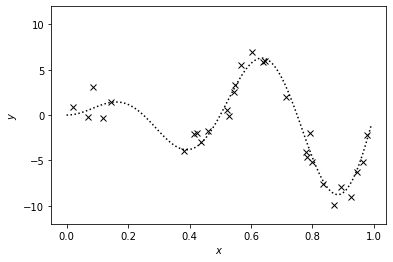

In [5]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
X_star = np.arange(0, 1, 0.01)
n_points = 30
f = lambda x: 10 * x * np.sin(4 * np.pi * x)
X = np.sort(np.random.random(size=n_points))
r = f(X) + np.random.normal(0, 1, size=n_points)
plt.ylim(-12, 12)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.plot(X, r, 'x', color='black')

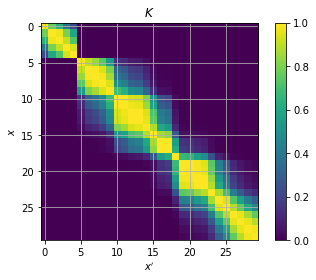

In [8]:
def gaussian_kernel(x1, x2, gamma=100):
    return np.exp(-gamma * (x1 - x2)**2)

K = np.zeros((len(X), len(X)))
for i, xi in enumerate(X):
    for j, xj in enumerate(X):
        K[i,j] = gaussian_kernel(xi, xj)

plt.xlabel(r'$x^{\prime}$')
plt.ylabel(r'$x$')
plt.title(r'$K$')
plt.imshow(K)
plt.colorbar()
plt.grid(None)

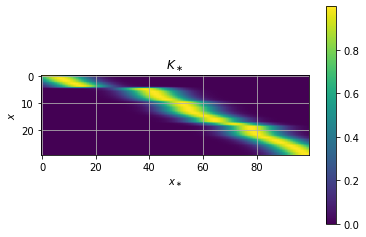

In [9]:
K_star = np.zeros((len(X), len(X_star)))
for i, xi in enumerate(X):
    for j, xj_star in enumerate(X_star):
        K_star[i,j] = gaussian_kernel(xi, xj_star)

plt.xlabel(r'$x_\ast$')
plt.ylabel(r'$x$')
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.colorbar()
plt.grid(None)

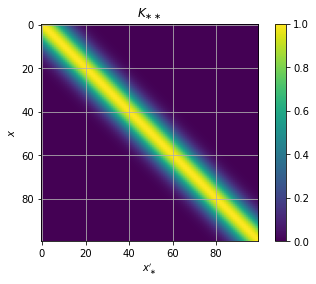

In [10]:
K_starstar = np.zeros((len(X_star), len(X_star)))
for i, xi_star in enumerate(X_star):
    for j, xj_star in enumerate(X_star):
        K_starstar[i,j] = gaussian_kernel(xi_star, xj_star)

plt.xlabel(r'$x_\ast^{\prime}$')
plt.ylabel(r'$x$')
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)
plt.colorbar()
plt.grid(None)

Text(0, 0.5, '$y$')

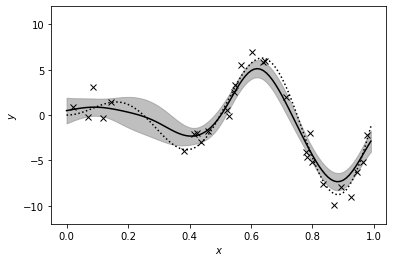

In [11]:
s = 1
A = np.linalg.inv(K + s * np.eye(K.shape[0]))
mu = np.dot(np.dot(K_star.T, A), r)
sigma = K_starstar - np.dot(np.dot(K_star.T, A), K_star)
plt.ylim(-12, 12)
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.fill_between(X_star, mu-2 * np.sqrt(np.diag(sigma)), mu+2*np.sqrt(np.diag(sigma)), alpha=.5, color='gray')
plt.plot(X_star, mu, color='black')
plt.plot(X, r, 'x', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Text(0, 0.5, '$y$')

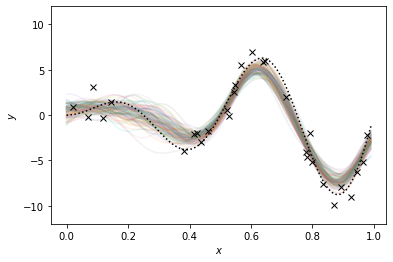

In [12]:
plt.ylim(-12,12)
for _ in range(100):
    plt.plot(X_star, np.random.multivariate_normal(mu, sigma), alpha=0.1)
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.plot(X, r, 'x', color='black')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

#### 計算高速化のための工夫
$$
\begin{align}
K(X,X')&=\begin{pmatrix} \exp(-\gamma(|\boldsymbol{x}_1-\boldsymbol{x}_1'|^2))&\cdots&\exp(-\gamma(|\boldsymbol{x}_1-\boldsymbol{x}_M'|^2))\\
\vdots&\cdots&\vdots\\
\exp(-\gamma(|\boldsymbol{x}_N-\boldsymbol{x}_1'|^2))&\cdots&\exp(-\gamma(|\boldsymbol{x}_N-\boldsymbol{x}_M'|^2))
\end{pmatrix}\\
&=\exp\bigg(-\gamma \begin{pmatrix} |\boldsymbol{x}_1-\boldsymbol{x}_1'|^2&\cdots&|\boldsymbol{x}_1-\boldsymbol{x}_M'|^2 \\
\vdots&\cdots&\vdots\\
|\boldsymbol{x}_N-\boldsymbol{x}_1'|^2&\cdots&|\boldsymbol{x}_N-\boldsymbol{x}_1'|^2
\end{pmatrix} \bigg)\\
&=\exp\bigg(-\gamma\big( \begin{pmatrix} |\boldsymbol{x}_1|^2&\cdots&|\boldsymbol{x}_1|^2 \\
\vdots&\cdots&\vdots\\
|\boldsymbol{x}_N|^2&\cdots&|\boldsymbol{x}_N|^2
\end{pmatrix}-2\begin{pmatrix} \boldsymbol{x}_1^T\boldsymbol{x}_1'&\cdots&\boldsymbol{x}_1^T\boldsymbol{x}_M' \\
\vdots&\cdots&\vdots\\
\boldsymbol{x}_N^T\boldsymbol{x}_1'&\cdots&\boldsymbol{x}_N^T\boldsymbol{x}_M'
\end{pmatrix}+\begin{pmatrix} |\boldsymbol{x}_1'|^2&\cdots&|\boldsymbol{x}_M'|^2 \\
\vdots&\cdots&\vdots\\
|\boldsymbol{x}_1'|^2&\cdots&|\boldsymbol{x}_M'|^2
\end{pmatrix} \big) \bigg)\\
&=\exp(-\gamma(P_X^T-2Q_{X,X'}+P_{X'}))
\end{align}
$$
ここで、
$$
p_X=\begin{pmatrix} |\boldsymbol{x}_1|^2&\cdots&|\boldsymbol{x}_N|^2 \\
\vdots&\cdots&\vdots\\
|\boldsymbol{x}_1|^2&\cdots&|\boldsymbol{x}_N|^2
\end{pmatrix},\hspace{5mm}
Q_{X,X'}=\begin{pmatrix} \boldsymbol{x}_1^T\boldsymbol{x}_1'&\cdots&\boldsymbol{x}_1^T\boldsymbol{x}_M' \\
\vdots&\cdots&\vdots\\
\boldsymbol{x}_N^T\boldsymbol{x}_1'&\cdots&\boldsymbol{x}_N^T\boldsymbol{x}_M'
\end{pmatrix}
$$
と定義した。
ある正方行列の対角成分を行ベクトルとして返す関数$\delta$を考えると、$Q_{X,X},Q_{X',X'}$の対角成分はそれぞれ下式のように表せる。
$$
\begin{align}
\delta(Q_{X,X})&=(\boldsymbol{x}_1^T\boldsymbol{x}_1,\cdots,\boldsymbol{x}_N^T\boldsymbol{x}_N)\\
&=(|\boldsymbol{x}_1|^2,\cdots,|\boldsymbol{x}_N|^2)\\
\delta(Q_{X',X'})&=(\boldsymbol{x}_1'^T\boldsymbol{x}_1',\cdots,\boldsymbol{x}_N'^T\boldsymbol{x}_N')\\
&=(|\boldsymbol{x}_1'|^2,\cdots,|\boldsymbol{x}_N'|^2)
\end{align}
$$
ここで、与えられた行ベクトルを行方向に$a$回繰り返した行列を返す関数$T_a$を考えると、それぞれ
$$
\begin{align}
P_X&=T_M(\delta(Q_{X,X}))\\
P_{X'}&=T_N(\delta(Q_{X',X'}))
\end{align}
$$
と表される。したがって、カーベル行列は以下のように表せる。
$$
K(X,X')=\exp\big(-\gamma\big(T_M^T(\delta(Q_{X,X})) - 2Q_{X,X'}+T_N(\delta(Q_{X',X'}))\big)\big)
$$
この結果を利用すれば、ガウス過程に必要なカーネル行列はそれぞれ以下のようにして計算できる。
$$
K=K(X,X)=\exp\big(-\gamma\big(T_M^T(\delta(Q_{X,X})) - 2Q_{X,X}+T_N(\delta(Q_{X,X}))\big)\big)\\
K_*=K(X,X_*)=\exp\big(-\gamma\big(T_M^T(\delta(Q_{X,X})) - 2Q_{X,X_*}+T_N(\delta(Q_{X_*,X_*}))\big)\big)\\
K_{**}=K(X_*,X_*)=\exp\big(-\gamma\big(T_M^T(\delta(Q_{X_*,X_*})) - 2Q_{X_*,X_*}+T_N(\delta(Q_{X_*,X_*}))\big)\big)
$$


In [23]:
n_points = 30
X = np.sort(np.random.random(size=n_points))
X_star = np.arange(0, 1, 0.01)

gamma = 100
X = np.expand_dims(X, 0)
X_star = np.expand_dims(X_star, 0)
Q = np.dot(X.T, X)
Q_star = np.dot(X.T, X_star)
Q_starstar = np.dot(X_star.T, X_star)

K = np.exp(-gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T - 2*Q + np.tile(np.diag(Q), (X.shape[1], 1))))
K_star = np.exp(-gamma * (np.tile(np.diag(Q), (X_star.shape[1], 1)).T - 2*Q_star + np.tile(np.diag(Q_starstar), (X.shape[1], 1))))
K_starstar = np.exp(-gamma * (np.tile(np.diag(Q_starstar), (X_star.shape[1], 1)).T - 2*Q_starstar + np.tile(np.diag(Q_starstar), (X_star.shape[1], 1))))

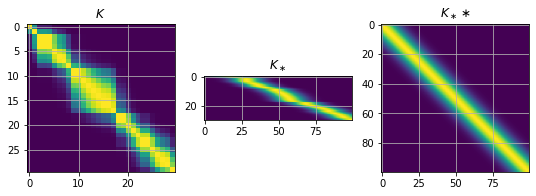

In [24]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.title(r'$K$')
plt.imshow(K)
plt.grid(None)
plt.subplot(1,3,2)
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.grid(None)
plt.subplot(1,3,3)
plt.title(r'$K_\ast\ast$')
plt.imshow(K_starstar)
plt.grid(None)

Text(0, 0.5, 'Hue')

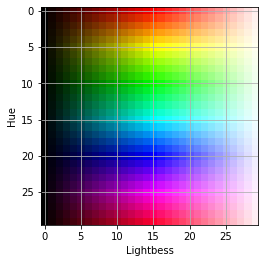

In [26]:
import colorsys

N = 30
X_im = np.zeros((N,N,2))
rs = []
xs = []
for i in range(N):
    for j in range(N):
        X_im[i,j,0] = i/N
        X_im[i,j,1] = j/N
hl_to_rgb = lambda x: colorsys.hls_to_rgb(x[0], x[1], 1)
X_rgb = np.apply_along_axis(hl_to_rgb, -1, X_im)
plt.imshow(X_rgb)
plt.grid(None)
plt.xlabel('Lightbess')
plt.ylabel('Hue')

### GP-UCBアルゴリズム
GP-UCB(ガウス過程UCB)アルゴリズムはガウス過程によって得られる期待値関数の事後分布の期待値と分散をもとにUCB値を計算し、UCB値が最大となる解を逐次的に選択するアルゴリズムである。
ある解$\boldsymbol{x}_*\in X$のUCB値$UCB_{\boldsymbol{x}_*}$は下式にように求められる。
$$
\begin{align}
UCB_{\boldsymbol{x}_*}&=E[f_*|\boldsymbol{x}_*]+\alpha\sqrt{V[f_*|\boldsymbol{x}_*]}\\
&=\boldsymbol{k}_*^T(\sigma^2I+K)^{-1}\boldsymbol{r}+\alpha\sqrt{k_{**}-\boldsymbol{k}_*^T(\sigma^2I+K)^{-1}\boldsymbol{k}_*}
\end{align}
$$
このUCB値のように選択すべき解を指し示す関数のことを獲得関数と呼ぶ。

In [151]:
X_im = np.zeros((N, N, 2))
rs = []
xs = []
for i in range(N):
    for j in range(N):
        X_im[i, j, 0] = i / N  # Hue
        X_im[i, j, 1] = j / N  # Lightness
X_star = X_im.reshape((N*N, 2)).T

class GPUCBAgent(object):
    def __init__(self):
        self.xs = []
        self.rs = []
        self.gamma = 10
        self.s = 0.5
        self.alpha = 2
        self.Q_starstar = X_star.T.dot(X_star)
        self.K_starstar = np.exp(-self.gamma * (
        np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1)).T
        - 2 * self.Q_starstar
        + np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1))))
        self.mu = np.zeros(self.K_starstar.shape[0])
        self.sigma = self.K_starstar
    
    def get_arm(self):
        ucb = self.mu + self.alpha * np.diag(self.sigma)
        return X_star[:, np.argmax(ucb)], ucb
    
    def sample(self, x, r):
        self.xs.append(x)
        self.rs.append(r)
        X = np.array(self.xs).T

        Q = X.T.dot(X)
        Q_star = X.T.dot(X_star)
        K = np.exp(-self.gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T
                                  - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
        K_star = np.exp(-self.gamma * (
            np.tile(np.diag(Q), (X_star.shape[1], 1)).T
            - 2 * Q_star
            + np.tile(np.diag(self.Q_starstar), (X.shape[1], 1))))
        A = np.linalg.inv(self.s + np.identity(K.shape[0]) + K)
        self.mu = K_star.T.dot(A).dot(self.rs)
        self.sigma = self.K_starstar - K_star.T.dot(A).dot(K_star)

#### 対話型最適化による動作確認
人間がエージェントに与える評価値は、-2(まったく異なる)、-1(やや異なる)、0(どちらとも言えない)、1(やや同じ)、2(まったく同じ)の5段階の整数を与えるものとする。

In [152]:
from mpl_toolkits.axes_grid1 import ImageGrid

def visualize(agent, x, f):
    vmax = 1.6
    vmin = -1.6
    contour_linewidth = 0.6
    contour_fontsize = 6
    contour_levels = np.linspace(-2, 2, 17)
    fig = plt.figure()
    grid = ImageGrid(fig, 211, nrows_ncols=(1, 2), axes_pad=0.1)
    grid[0].imshow(X_rgb)
    cs = grid[0].contour(f.reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
    grid[0].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[0].plot(x[1]*N, x[0]*N, '*', markersize=20, color='yellow', markeredgecolor='black')
    grid[0].set_title('Solution space')
    grid[0].set_xticklabels([])
    grid[0].set_yticklabels([])
    grid[1].imshow(np.tile(hl_to_rgb(x), (N,N,1)))
    grid[1].set_title('Proposed color')
    grid[1].set_xticklabels([])
    grid[1].set_yticklabels([])
    grid = ImageGrid(fig, 212, nrows_ncols=(1, 3), axes_pad=0.2,
                     share_all=True, label_mode='L', cbar_location='left', cbar_mode='single')
    im = grid[0].imshow(agent.mu.reshape(N,N), vmin=vmin, vmax=vmax)
    cs = grid[0].contour(agent.mu.reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
    grid[0].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[0].set_title(r'$\mu$')
    grid.cbar_axes[0].colorbar(im)
    grid[1].imshow(np.diag(agent.sigma).reshape(N,N), vmin=vmin, vmax=vmax)
    cs = grid[1].contour(np.diag(agent.sigma).reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
    grid[1].set_title(r'$diag(\Sigma)$')
    grid[1].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[2].imshow(f.reshape(N,N), vmin=vmin, vmax=vmax)
    cs = grid[2].contour(f.reshape(N,N), levels=contour_levels, colors='black', linewidths=contour_linewidth)
    grid[2].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[2].set_title('Acquisition function')
    plt.show()

In [155]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

<ipython-input-152-77570130b22c>:12: UserWarning: No contour levels were found within the data range.
  cs = grid[0].contour(f.reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
<ipython-input-152-77570130b22c>:25: UserWarning: No contour levels were found within the data range.
  cs = grid[0].contour(agent.mu.reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-152-77570130b22c>:30: UserWarning: No contour levels were found within the data range.
  cs = grid[1].contour(np.diag(agent.sigma).reshape(N,N), levels=contour_levels, colors='white', linewidths=c

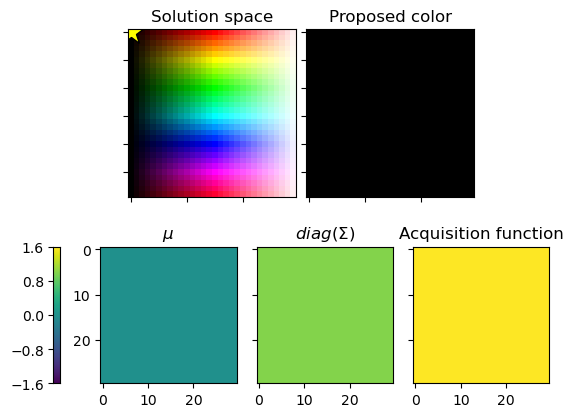

In [160]:
agent = GPUCBAgent()
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


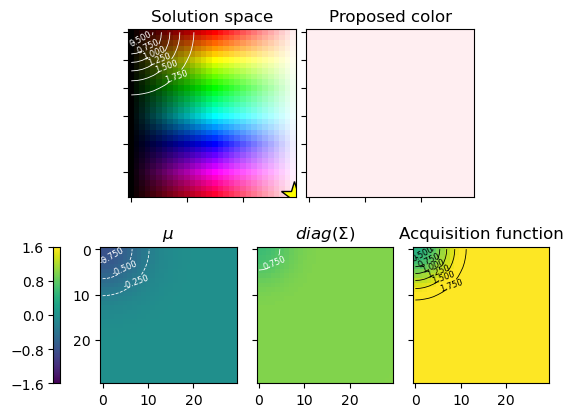

In [161]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


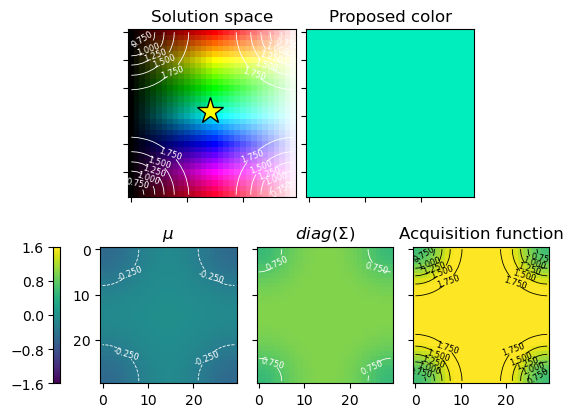

In [162]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


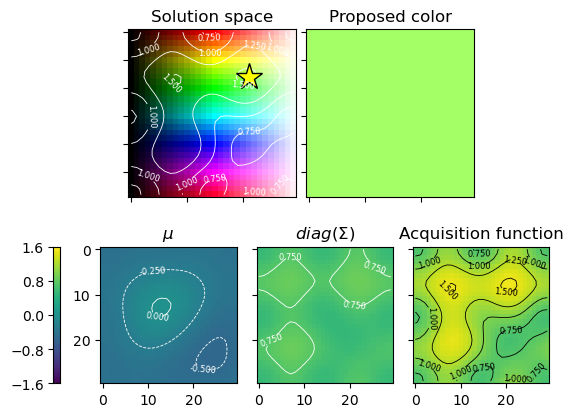

In [163]:
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-152-77570130b22c>:30: UserWarning: No contour levels were found within the data range.
  cs = grid[1].contour(np.diag(agent.sigma).reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)


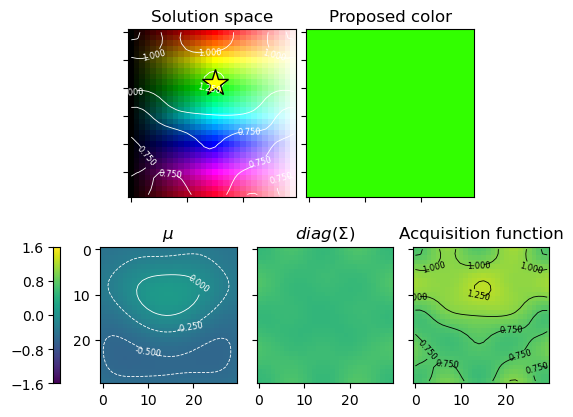

In [164]:
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

### GP-TSアルゴリズム
ガウス過程をトンプソン抽出に応用することでGP-TS(ガウス過程トンプソン抽出)アルゴリズムを構成できる。

In [165]:
class GPTSAgent(object):
    def __init__(self):
        self.xs = []
        self.rs = []
        self.gamma = 10
        self.s = 0.5
        self.Q_starstar = X_star.T.dot(X_star)
        self.K_starstar = np.exp(-self.gamma * (
            np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1)).T
            - 2 * self.Q_starstar
            + np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1))))
        self.mu = np.zeros(self.K_starstar.shape[0])
        self.sigma = self.K_starstar
    
    def get_arm(self):
        f = np.random.multivariate_normal(self.mu, self.sigma)
        return X_star[:, np.argmax(f)], f
    
    def sample(self, x, r):
        self.xs.append(x)
        self.rs.append(r)
        X = np.array(self.xs).T

        Q = X.T.dot(X)
        Q_star = X.T.dot(X_star)
        K = np.exp(-self.gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T
                                  - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
        K_star = np.exp(-self.gamma * (
            np.tile(np.diag(Q), (X_star.shape[1], 1)).T
            - 2 * Q_star
            + np.tile(np.diag(self.Q_starstar), (X.shape[1], 1))))
        A = np.linalg.inv(self.s + np.identity(K.shape[0]) + K)
        self.mu = K_star.T.dot(A).dot(self.rs)
        self.sigma = self.K_starstar - K_star.T.dot(A).dot(K_star)

<ipython-input-152-77570130b22c>:25: UserWarning: No contour levels were found within the data range.
  cs = grid[0].contour(agent.mu.reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-152-77570130b22c>:30: UserWarning: No contour levels were found within the data range.
  cs = grid[1].contour(np.diag(agent.sigma).reshape(N,N), levels=contour_levels, colors='white', linewidths=contour_linewidth)


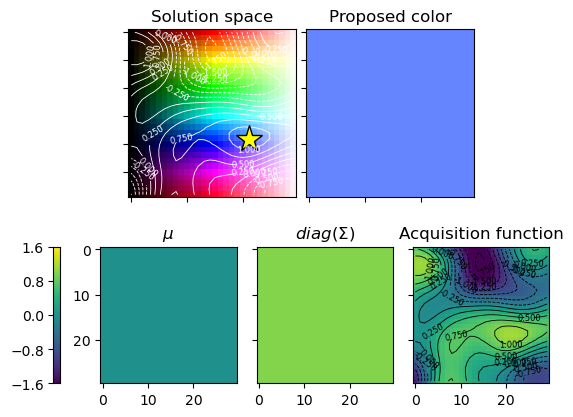

In [166]:
agent = GPTSAgent()
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


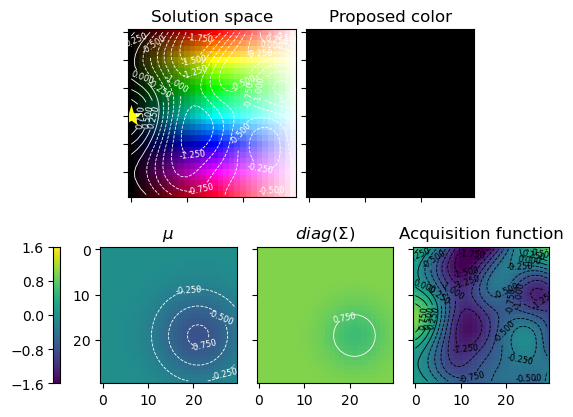

In [167]:
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

<ipython-input-152-77570130b22c>:28: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


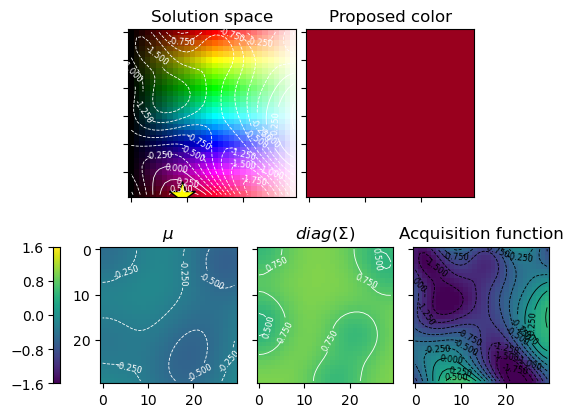

In [168]:
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)